In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier  # An extra-trees classifier(比随机森林更随机.通常,这可以进一步减少模型的方差,但可能会增加一些偏差)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
data = load_breast_cancer()  # 乳腺癌数据集
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
print("RF: Accuracy on test data: {:.2f}".format(clf_rf.score(X_test, y_test)))

clf_ec = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_ec.fit(X_train, y_train)
print("EC: Accuracy on test data: {:.2f}".format(clf_ec.score(X_test, y_test)))

RF: Accuracy on test data: 0.97
EC: Accuracy on test data: 0.98


In [8]:
minmax = MinMaxScaler()
rf_feature_importances = minmax.fit_transform(clf_rf.feature_importances_.reshape(-1, 1)).reshape(-1, )  # 随机森林特征相对重要性的最值归一化结果
rf_tree_importance_sorted_idx = np.argsort(rf_feature_importances)
rf_tree_indices = np.arange(0, len(rf_feature_importances)) + 0.5
rf_tree_importance_sorted_idx  # 特征相对重要性的排名(可以看出第一个特征的重要性在所有特征中排名15+1)

array([15, 18,  9,  8, 11, 14, 17, 29, 19, 16,  4, 12, 24,  5, 28,  1, 25,
       21, 10, 26,  0,  3, 13,  2, 22, 20,  6,  7, 23, 27], dtype=int64)

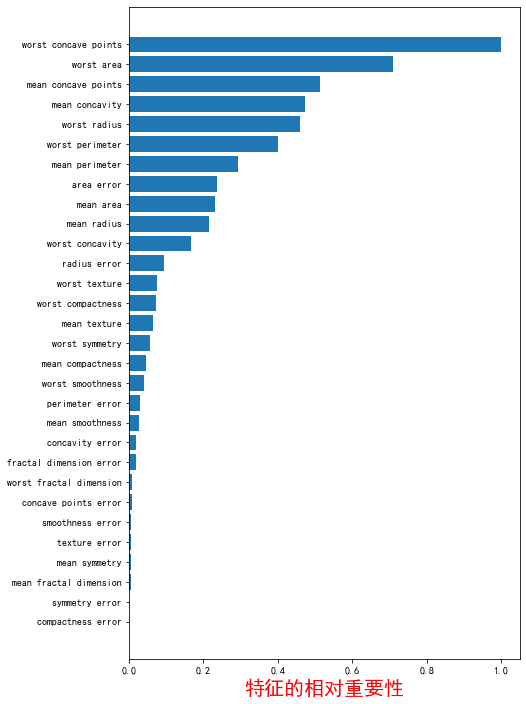

In [9]:
plt.figure(figsize=(7, 12))
ax = plt.subplot(111)
ax.barh(rf_tree_indices, rf_feature_importances[rf_tree_importance_sorted_idx])
ax.set_yticks(rf_tree_indices)
ax.set_yticklabels(data.feature_names[rf_tree_importance_sorted_idx])
ax.set_xlabel('特征的相对重要性', size=20, color='red')
plt.show()

In [10]:
clf_ec.feature_importances_  # An extra-trees classifier 特征的相对重要性

array([0.06526478, 0.02263436, 0.04037335, 0.04137443, 0.01127867,
       0.03141925, 0.06792653, 0.07436193, 0.00680299, 0.00864427,
       0.01592531, 0.00632018, 0.01699375, 0.0355914 , 0.00717712,
       0.0077469 , 0.00781951, 0.01101074, 0.00687928, 0.00718805,
       0.10172404, 0.02771603, 0.10386939, 0.06440105, 0.01958991,
       0.02389705, 0.05887149, 0.08507095, 0.01407766, 0.00804961])